In [1]:
import testCases
import planar_utils
import numpy as np
import matplotlib.pyplot as plt
import sklearn

np.random.seed(1)

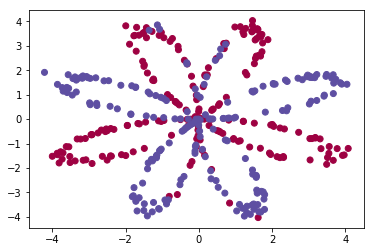

In [2]:
X, Y = planar_utils.load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c = np.squeeze(Y),cmap = plt.cm.Spectral)

In [3]:
print('X的维度：' + str(X.shape))
print('Y的维度：' + str(Y.shape))

X的维度：(2, 400)
Y的维度：(1, 400)


In [4]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

/home/lhy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lhy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Logistic Regression')

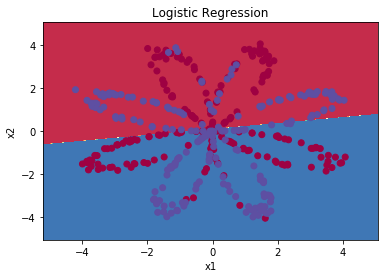

In [5]:
planar_utils.plot_decision_boundary(lambda x:clf.predict(x),X,np.squeeze(Y))
plt.title('Logistic Regression')

In [6]:
predict_label = clf.predict(X.T)
originLabel = list(Y.T)
print('LR accuracy =',sklearn.metrics.accuracy_score(originLabel,predict_label))

LR accuracy = 0.47


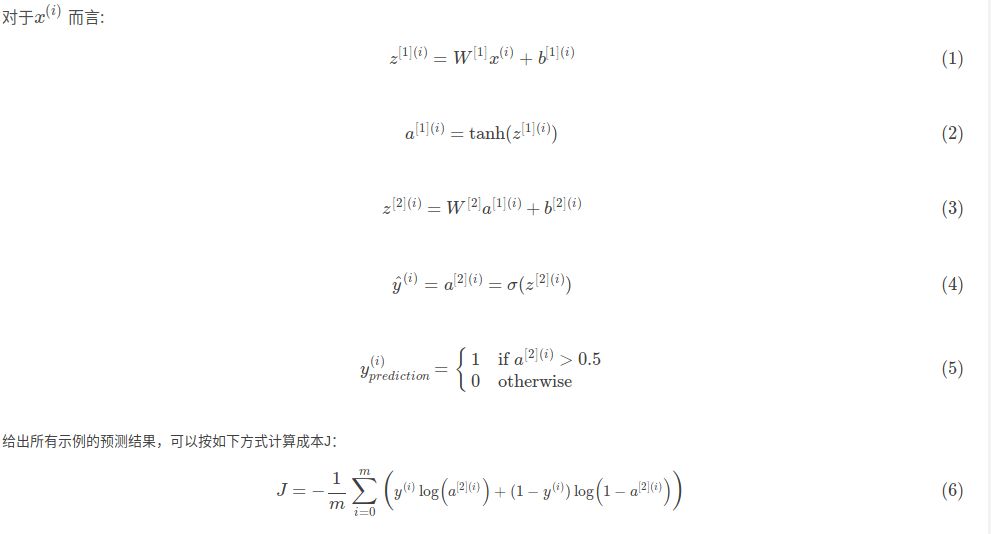

构建神经网络的一般方法是：           
1. 定义神经网络结构（输入单元的数量，隐藏单元的数量等）。               
2. 初始化模型的参数
3. 循环：
    实施前向传播
    计算损失
    实现向后传播
    更新参数（梯度下降）     
    我们要它们合并到一个nn_model() 函数中，当我们构建好了nn_model（）并学习了正确的参数，我们就可以预测新的数据。

In [7]:
#定义神经网络结构
def layer(x,y):
    """
    params:
    x:输入数据
    y:输入标签
    
    return:
    n_x:输入层数量
    n_h:隐含层数量
    n_y:输出层数量
    """
    n_x = x.shape[0]
    n_h = 4
    n_y = y.shape[0]
    
    return (n_x,n_h,n_y)

In [8]:
#测试layer
x_test, y_test = testCases.layer_sizes_test_case()
n_x, n_h, n_y = layer(x_test, y_test)
print("输入层节点数量：" + str(n_x))
print("隐含层节点数量：" + str(n_h))
print("输出层节点数量：" + str(n_y))

输入层节点数量：5
隐含层节点数量：4
输出层节点数量：2


In [9]:
#参数初始化
def init_params(n_x, n_h, n_y):
    """
    params:
    n_x:输入层节点数量
    n_h:隐含层节点数量
    n_y:输出层节点数量
    
    return:
    params:字典包含：
        w1:权重矩阵 维度=(n_h, n_x)
        b1:偏移量 维度=(n_h, 1)
        w2:权重矩阵 维度=(n_y. n_h)
        b2:偏移量 维度=(n_y, 1)
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape = (n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape = (n_y, 1))
    
    assert W1.shape == (n_h, n_x)
    assert b1.shape == (n_h, 1)
    assert W2.shape == (n_y, n_h)
    assert b2.shape == (n_y, 1)
    
    params = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    
    return params

In [10]:
#测试init_params
n_x, n_h, n_y = testCases.initialize_parameters_test_case()
dic = init_params(n_x, n_h, n_y)
print('W1:\n' + str(dic['W1']))
print('b1:\n' + str(dic['b1']))
print('W2:\n' + str(dic['W2']))
print('b2:\n' + str(dic['b2']))

W1:
[[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1:
[[0.]
 [0.]
 [0.]
 [0.]]
W2:
[[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2:
[[0.]]


In [11]:
#前向传播
def forward_propagate(X, params):
    """
    params:
    X:输入矩阵 维度(n, m) n是该层unit数量，m是样本数量
    params:w1,b1,w2,b2的字典
    
    return:
    A2:第二次激活后的输出
    cache:Z1,A1,Z2,A2的字典
    """
    W1 = params['W1']
    B1 = params['b1']
    W2 = params['W2']
    B2 = params['b2']
    
    Z1 = np.dot(W1, X) + B1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = planar_utils.sigmoid(Z2)
    
    assert A2.shape == (1, X.shape[1])
    
    cache = {
        'Z1' : Z1,
        'A1' : A1,
        'Z2' : Z2,
        'A2' : A2
    }
    
    return (A2, cache)

In [12]:
#测试forward_propagate
X, params = testCases.forward_propagation_test_case()
A2, cache = forward_propagate(X, params)
print('A2 = ', A2)
print('meanA2:', np.mean(cache['A2']))
print('meanZ1:', np.mean(cache['Z1']))
print('meanA1:', np.mean(cache['A1']))
print('meanZ2:', np.mean(cache['Z2']))

A2 =  [[0.5002307  0.49985831 0.50023963]]
meanA2: 0.500109546852431
meanZ1: -0.0004997557777419902
meanA1: -0.000496963353231779
meanZ2: 0.00043818745095914653


In [13]:
#定义损失loss的累加求和均值cost
def compute_cost(A2, Y, params):
    """
    param:
    A2:第二次激活后的输出值
    Y:标签值
    params:W1,b1,W2,b2的字典
    
    return:
    cost:成本J 用交叉熵计算公式
    """
    m = Y.shape[1]
    W1 = params['W1']
    W2 = params['W2']
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    assert isinstance(cost, float)
    
    return cost

In [14]:
#测试compute_cost
A2, Y, params = testCases.compute_cost_test_case()
cost = compute_cost(A2, Y, params)
print('cost =',cost)

cost = 0.6929198937761266


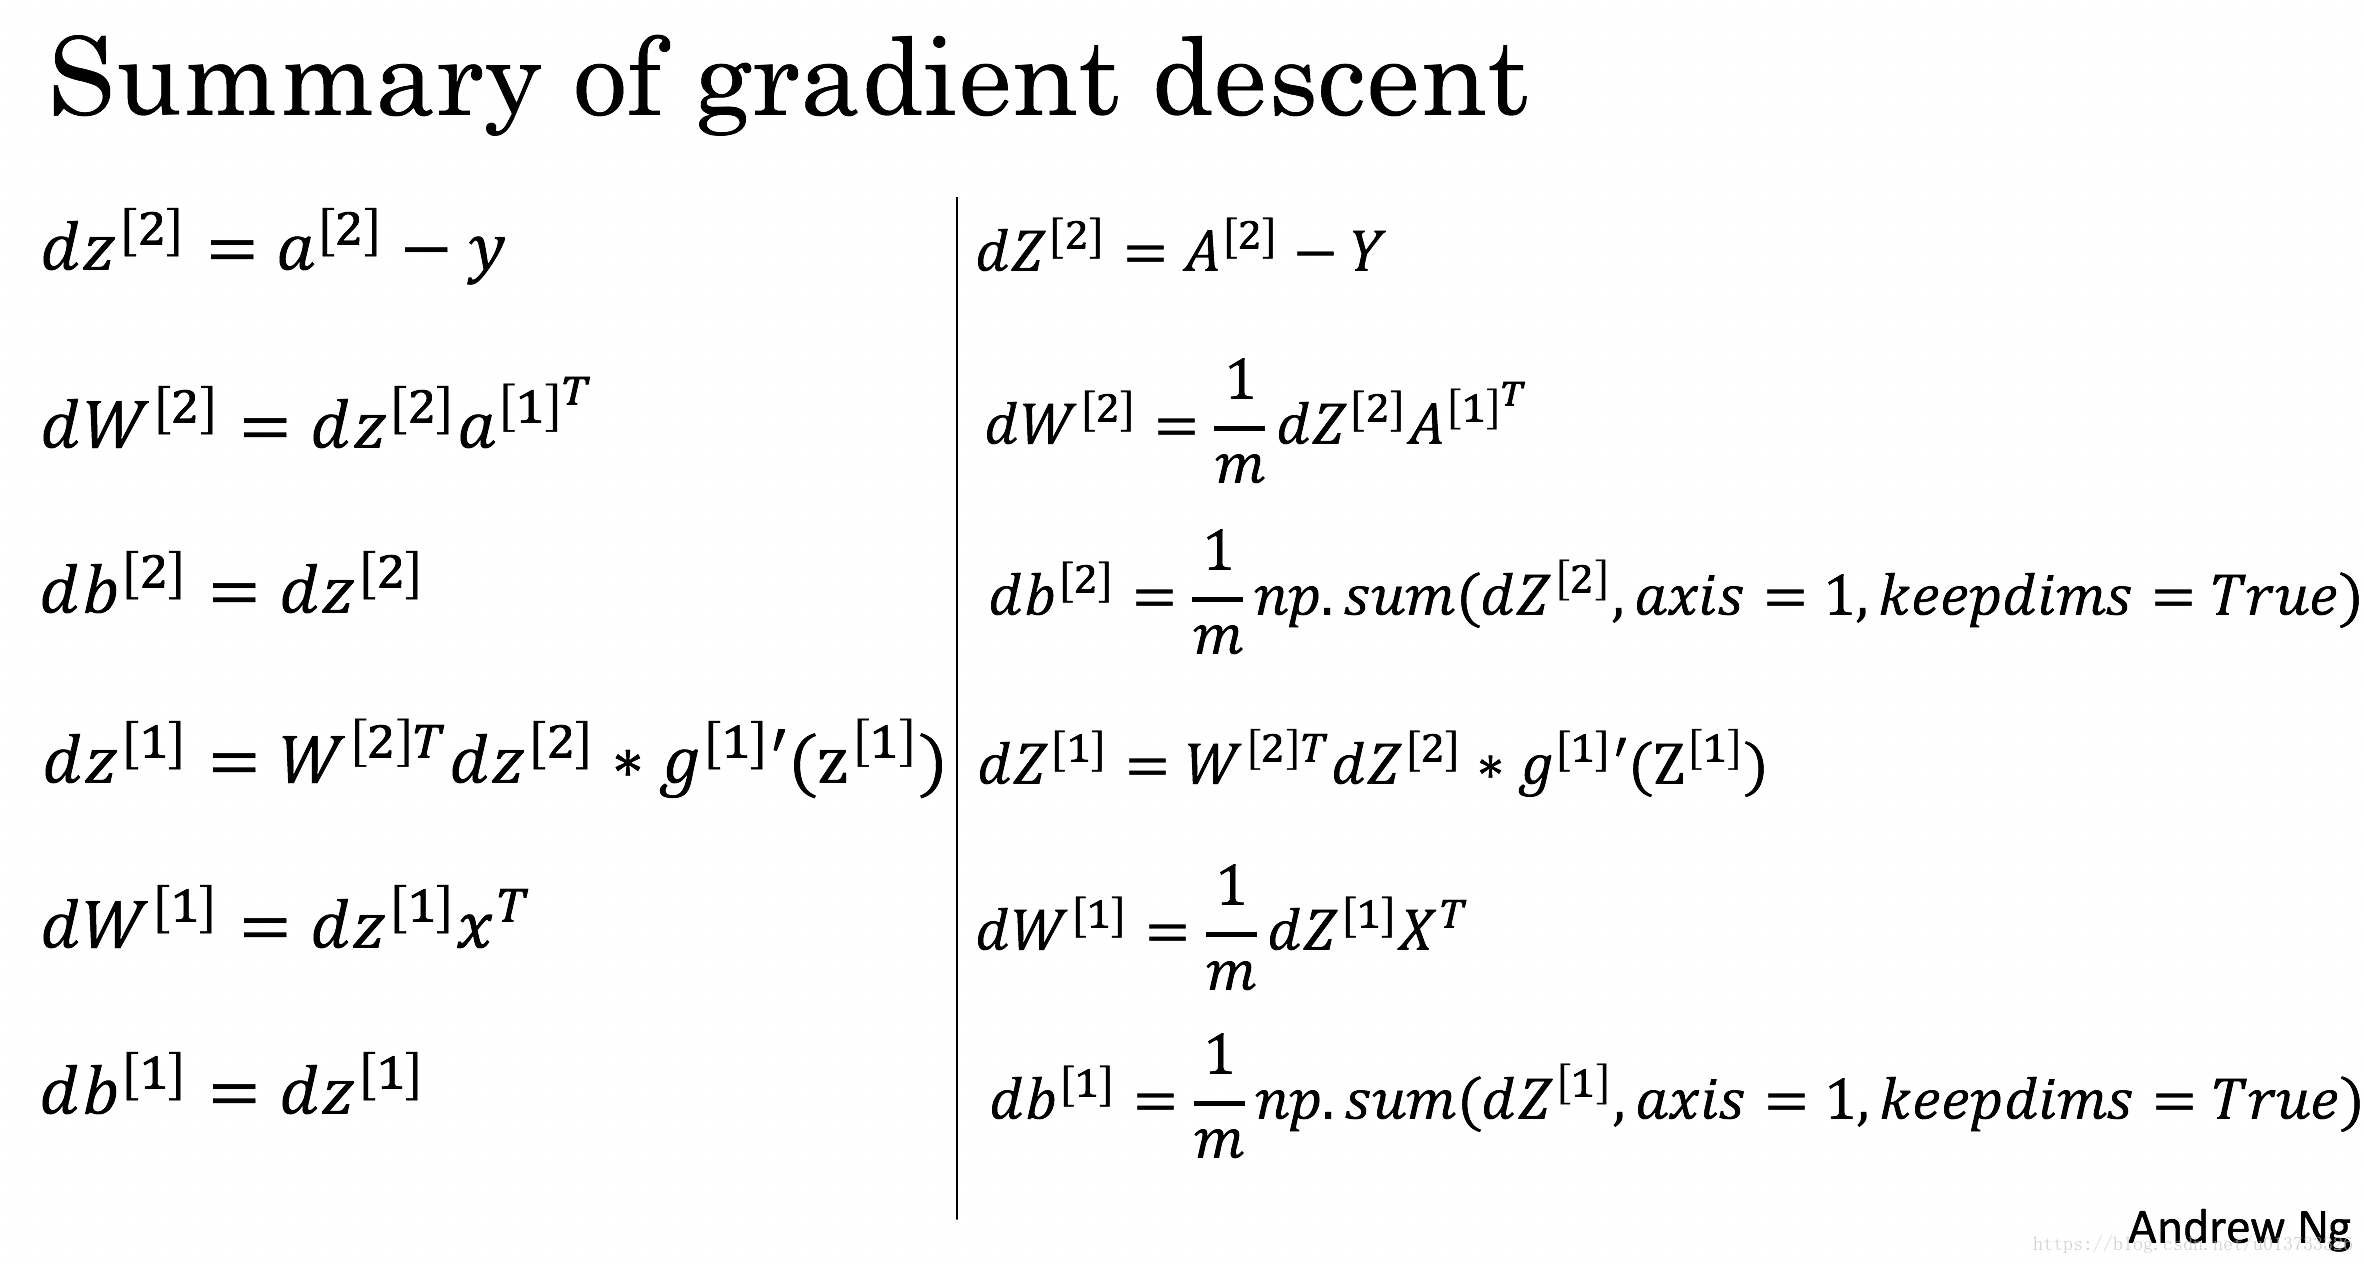

In [15]:
def back_propagate(params, cache, X, Y):
    """
    param:
    params:字典
    cache:字典包含W1,b1,W2,b2
    X:输入数据(n,m)n是输入层节点数，m是样本数
    Y:输入标签(1,m)
    
    return:
    grads:dw1,db1,dw2,db2
    """
    
    m = X.shape[1]
    
    W1 = params['W1']
    W2 = params['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2,A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)#按行相加，保持原维数不变
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1 - A1**2))#tanh的导数是1-tan^2h
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return grads

In [16]:
#测试back_propagate
param, cache, X, Y = testCases.backward_propagation_test_case()
grads = back_propagate(param, cache, X, Y)
print('dW1 =', str(grads['dW1']))
print('db1 =', str(grads['db1']))
print('dW2 =', str(grads['dW2']))
print('db2 =', str(grads['db2']))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [17]:
#定义参数迭代更新
def update_params(params, grads, learning_rata = 1.2):
    """
    param:
    params:字典
    grads:导数字典
    learning_rate:学习率α
    
    return:
    params:字典
    """
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    
    dW1, dW2 = grads['dW1'], grads['dW2']
    db1, db2 = grads['db1'], grads['db2']
    
    W1 = W1 - learning_rata * dW1
    b1 = b1 - learning_rata * db1
    W2 = W2 - learning_rata * dW2
    b2 = b2 - learning_rata * db2
    
    params = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    
    return params

In [18]:
#测试update_params
params, grads = testCases.update_parameters_test_case()
params = update_params(params, grads)
print('W1 =', str(params['W1']))
print('b1 =', str(params['b1']))
print('W2 =', str(params['W2']))
print('b2 =', str(params['b2']))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [19]:
#整合
def nn(X, Y, n_h, num_iterations, printJ = False):
    """
    params:
    X:输入数据 维度(n,m)，n输入层节点数量，m样本数量
    Y:原标签 维度(1,m)
    n_h:隐含层数量
    num_iterations:迭代次数
    printJ:为True时 每1000次打印一次成本数值
    
    return:
    params:返回学习好的参数，用来进行预测
    """
    np.random.seed(3)
    n_x = layer(X, Y)[0]
    n_y = layer(X, Y)[2]
    
    params = init_params(n_x, n_h, n_y)
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    for i in range(num_iterations):
        A2, cache = forward_propagate(X, params)
        cost = compute_cost(A2, Y, params)
        grads = back_propagate(params, cache, X, Y)
        params = update_params(params, grads, learning_rata = 0.5)
        
        if (printJ == True) and (i % 1000 == 0):
            print('第',i,'次循环','成本为:',str(cost))
    
    return params 

In [20]:
#测试nn
X, Y = testCases.nn_model_test_case()
params = nn(X, Y, 4, num_iterations = 10000, printJ = False)
print('W1 =', str(params['W1']))
print('b1 =', str(params['b1']))
print('W2 =', str(params['W2']))
print('b2 =', str(params['b2']))

/home/lhy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


W1 = [[-3.89167767  4.77541602]
 [-6.77960338  1.20272585]
 [-3.88338966  4.78028666]
 [ 6.77958203 -1.20272574]]
b1 = [[ 2.11530892]
 [ 3.41221357]
 [ 2.11585732]
 [-3.41221322]]
W2 = [[-2512.9093032  -2502.70799785 -2512.01655969  2502.65264416]]
b2 = [[-22.29071761]]


In [21]:
#预测 当activate > 0.5 时为1，否则为0
def predict(params, X):
    '''
    param:
    params:参数
    X:输入数据(n,m)，n为输入层节点数，m为样本数
    
    return:
    predict_label:返回预测标签
    '''
    A2, cache = forward_propagate(X, params)
    predict_label = np.round(A2)#对A2的值四舍五入
    
    return predict_label

In [22]:
#测试predict
params, X = testCases.predict_test_case()
pred = predict(params, X)
print(pred)

[[1. 0. 1.]]


In [23]:
#正式开始
X, Y = planar_utils.load_planar_dataset()
params = nn(X, Y, n_h = 4, num_iterations = 10000, printJ = True)
pred = predict(params, X)
print('Accuracy =',sklearn.metrics.accuracy_score(Y.T,pred.T))

第 0 次循环 成本为: 0.6930480201239823
第 1000 次循环 成本为: 0.3098018601352803
第 2000 次循环 成本为: 0.2924326333792646
第 3000 次循环 成本为: 0.2833492852647412
第 4000 次循环 成本为: 0.27678077562979253
第 5000 次循环 成本为: 0.2634715508859328
第 6000 次循环 成本为: 0.24204413129940774
第 7000 次循环 成本为: 0.23552486626608768
第 8000 次循环 成本为: 0.23140964509854278
第 9000 次循环 成本为: 0.22846408048352365
Accuracy = 0.905


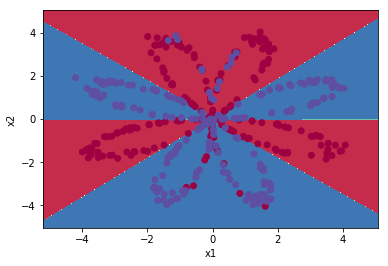

In [24]:
planar_utils.plot_decision_boundary(lambda x: predict(params, x.T), X, np.squeeze(Y))

Accuracy = 0.6725
Accuracy = 0.665
Accuracy = 0.8925
Accuracy = 0.9
Accuracy = 0.8975
Accuracy = 0.9
Accuracy = 0.8975
Accuracy = 0.895


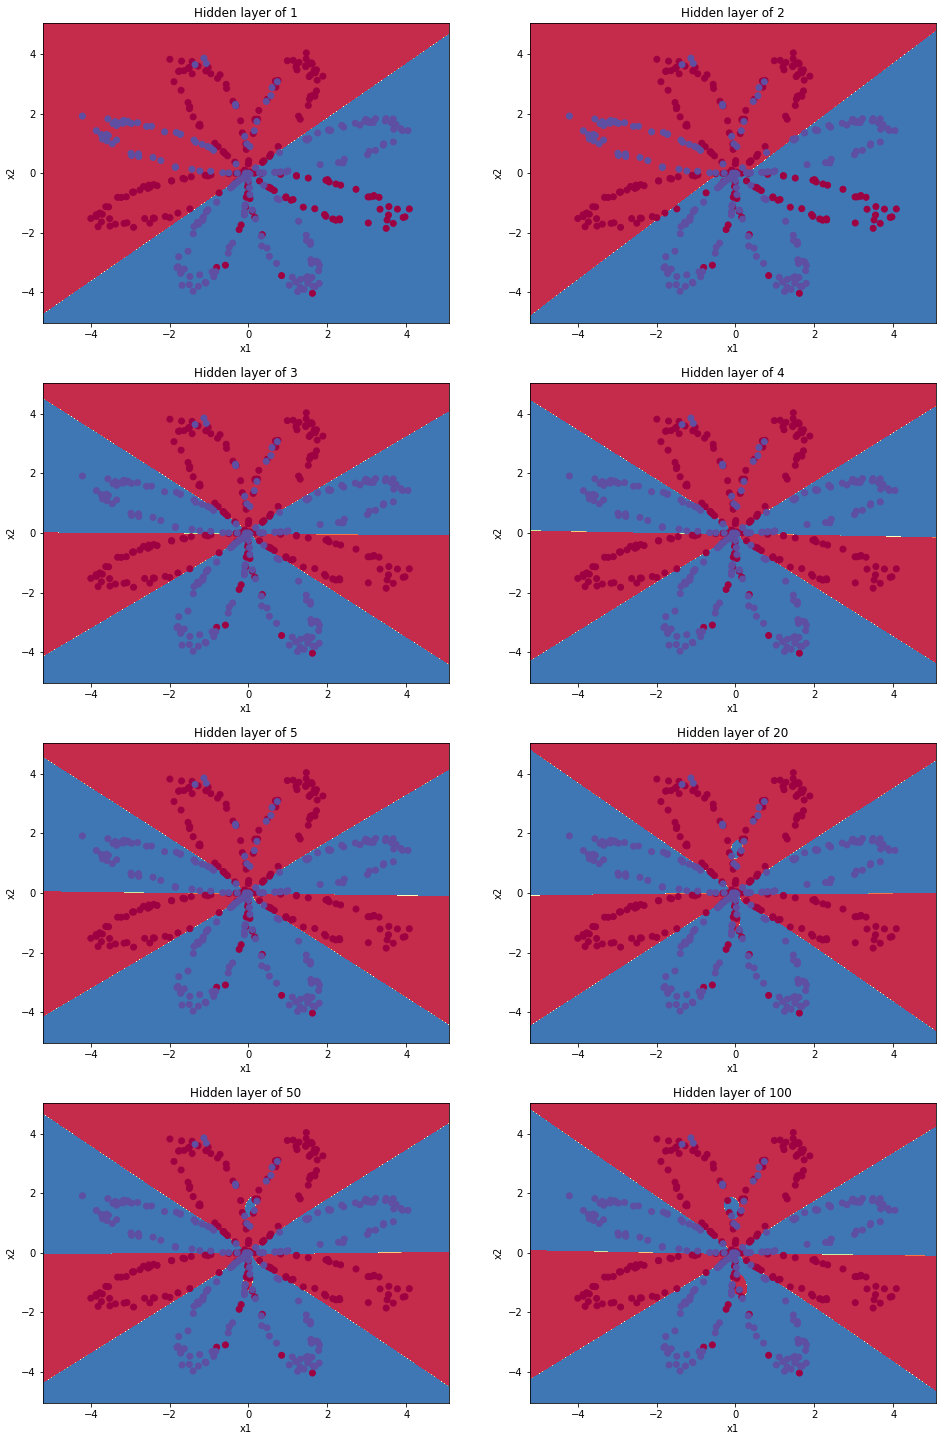

In [25]:
plt.figure(figsize = (16, 32))
hidden_layerNum = [1, 2, 3, 4, 5, 20, 50, 100]
for i, n_h in enumerate(hidden_layerNum):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden layer of %d' % n_h)
    params = nn(X, Y, n_h, num_iterations = 5000)
    planar_utils.plot_decision_boundary(lambda x : predict(params, x.T), X, np.squeeze(Y))
    pred = predict(params, X)
    print('Accuracy =',sklearn.metrics.accuracy_score(Y.T,pred.T))